## Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning

## Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

- longitude

- latitude

- housing_median_age

- total_rooms

- total_bedrooms

- population

- households

- median_income

- median_house_value

- ocean_proximity

- Acknowledgements

In [137]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [22]:
data = pd.read_csv("C:\\Users\\shekh\\Downloads\\archives\\housing.csv")

In [23]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [25]:
# as we can see that the ocean proximity feature is of object type so we have to encode it 

In [26]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

C:\Users\shekh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

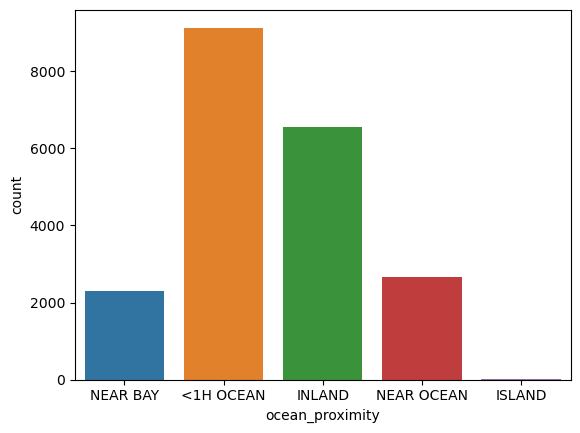

In [136]:
sns.countplot(data['ocean_proximity'])

- The count plot shows that most of the houses in the dataset are located inland, followed by houses near the ocean, in a bay area, and so on. The dataset contains a significant number of houses in different ocean proximity categories.

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

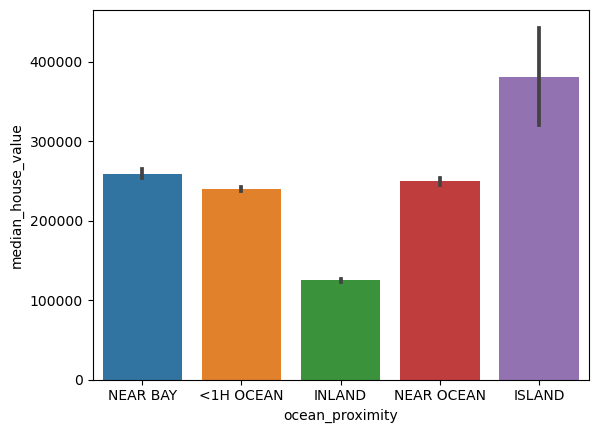

In [77]:
#### Comparing the price for the house located various places 
sns.barplot(data = data, x='ocean_proximity', y='median_house_value')

- above visualisation shows that people with more income can afford the house at island then bay area and then to near ocean, mostly low income people live inland 

In [27]:
data.shape

(20640, 10)

In [28]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

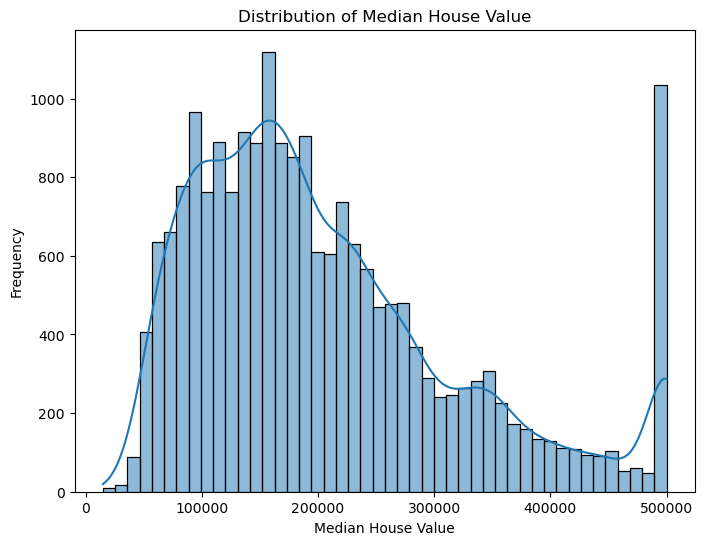

In [118]:
plt.figure(figsize=(8, 6))
sns.histplot(data['median_house_value'], kde=True)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()

- above plot tells us house value  with in specific range of price

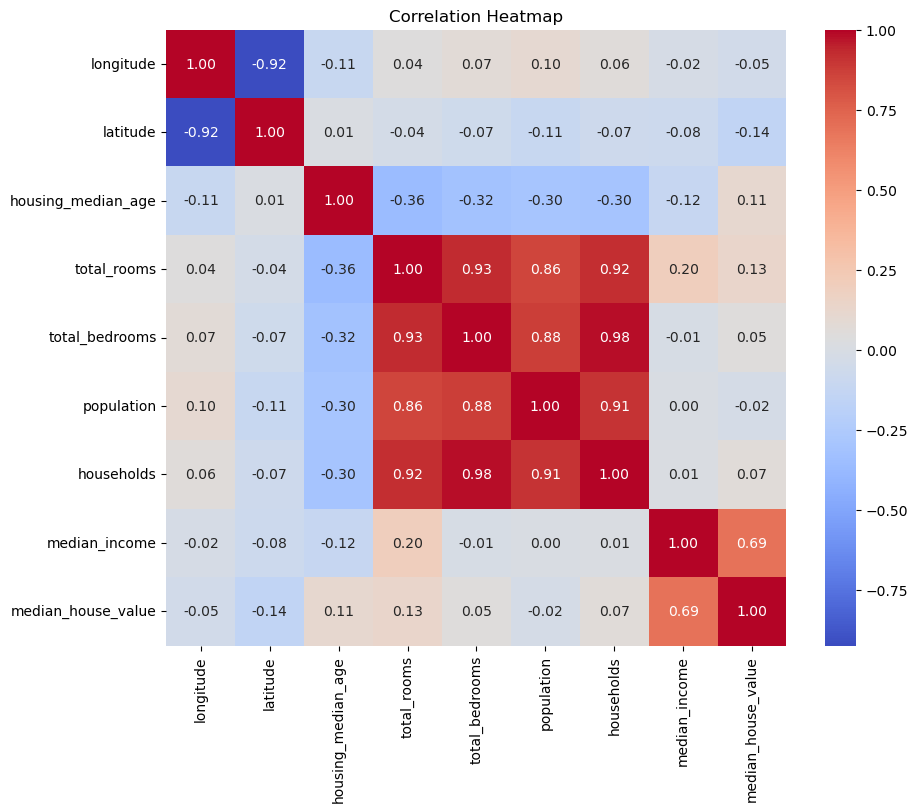

In [121]:
# Correlation heatmap of numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

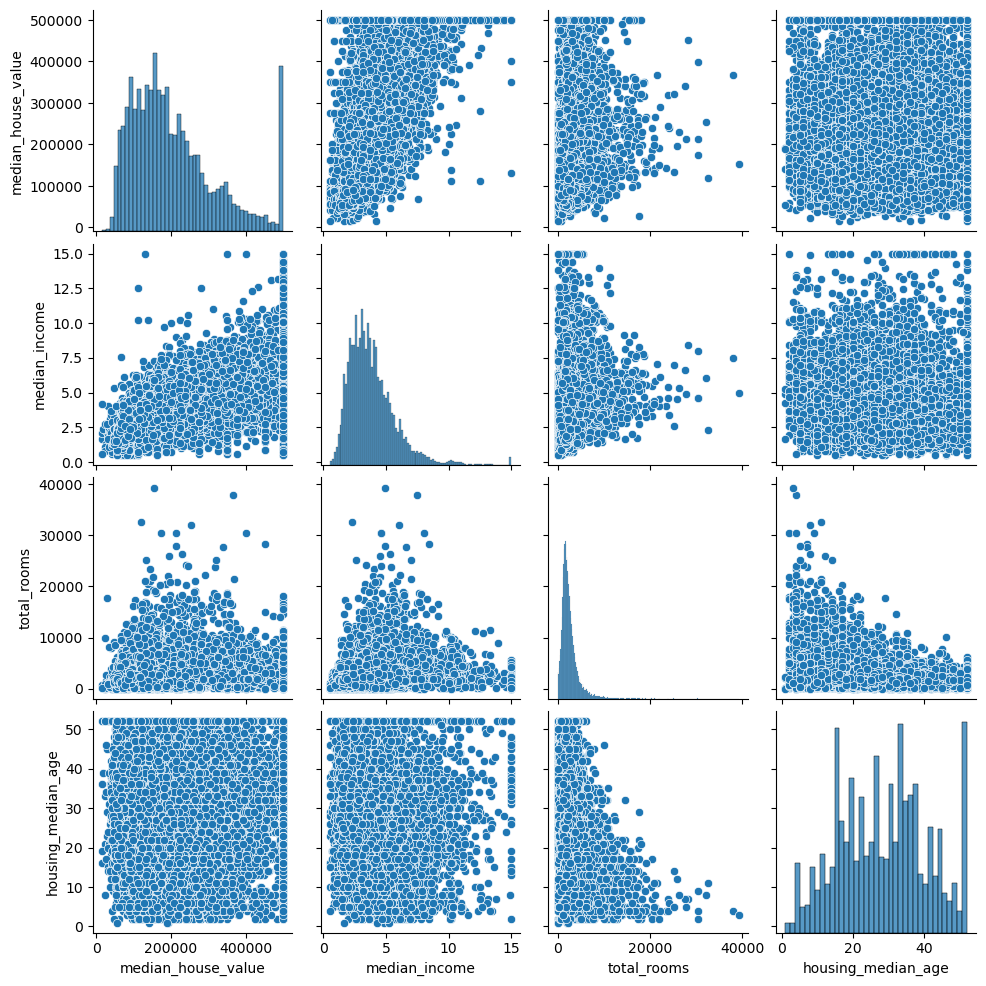

In [122]:
# Pair plot of selected numerical variables
sns.pairplot(data[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']])
plt.show()

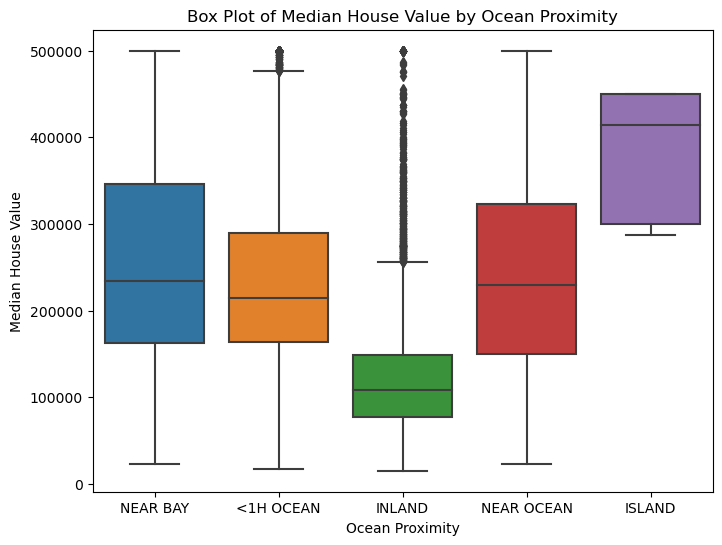

In [124]:
# Box plots for categorical variables (e.g., ocean_proximity)
plt.figure(figsize=(8, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Box Plot of Median House Value by Ocean Proximity')
plt.show()

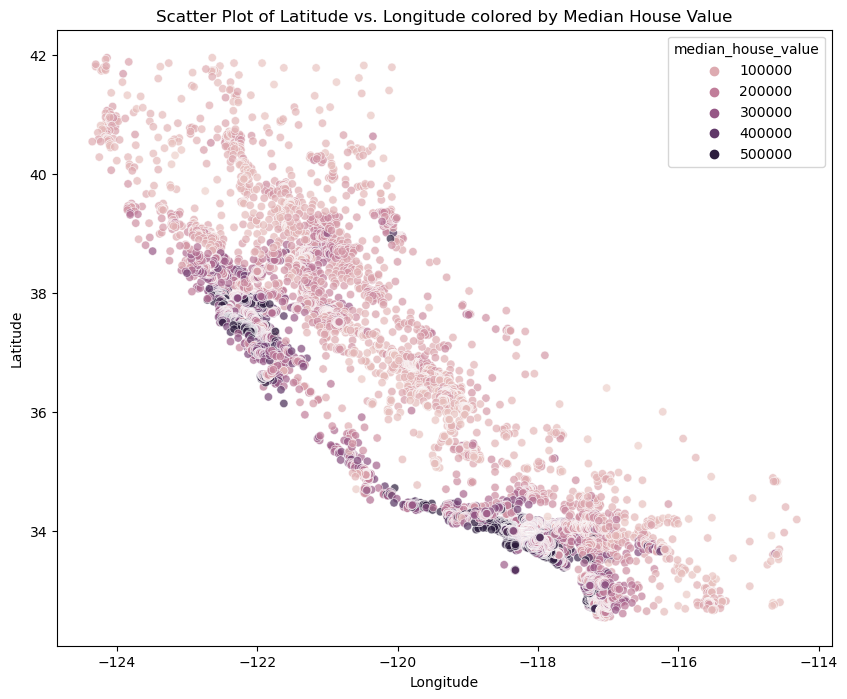

In [125]:
# Scatter plot of latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=data, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs. Longitude colored by Median House Value')
plt.show()


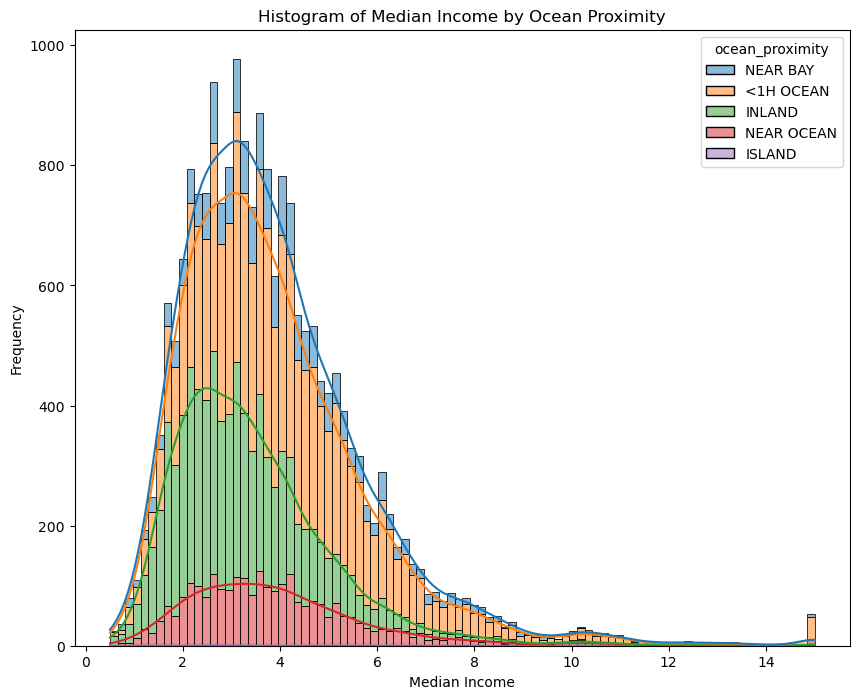

In [126]:
# Histogram of median_income by ocean_proximity
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='median_income', hue='ocean_proximity', kde=True, multiple='stack')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Histogram of Median Income by Ocean Proximity')
plt.show()

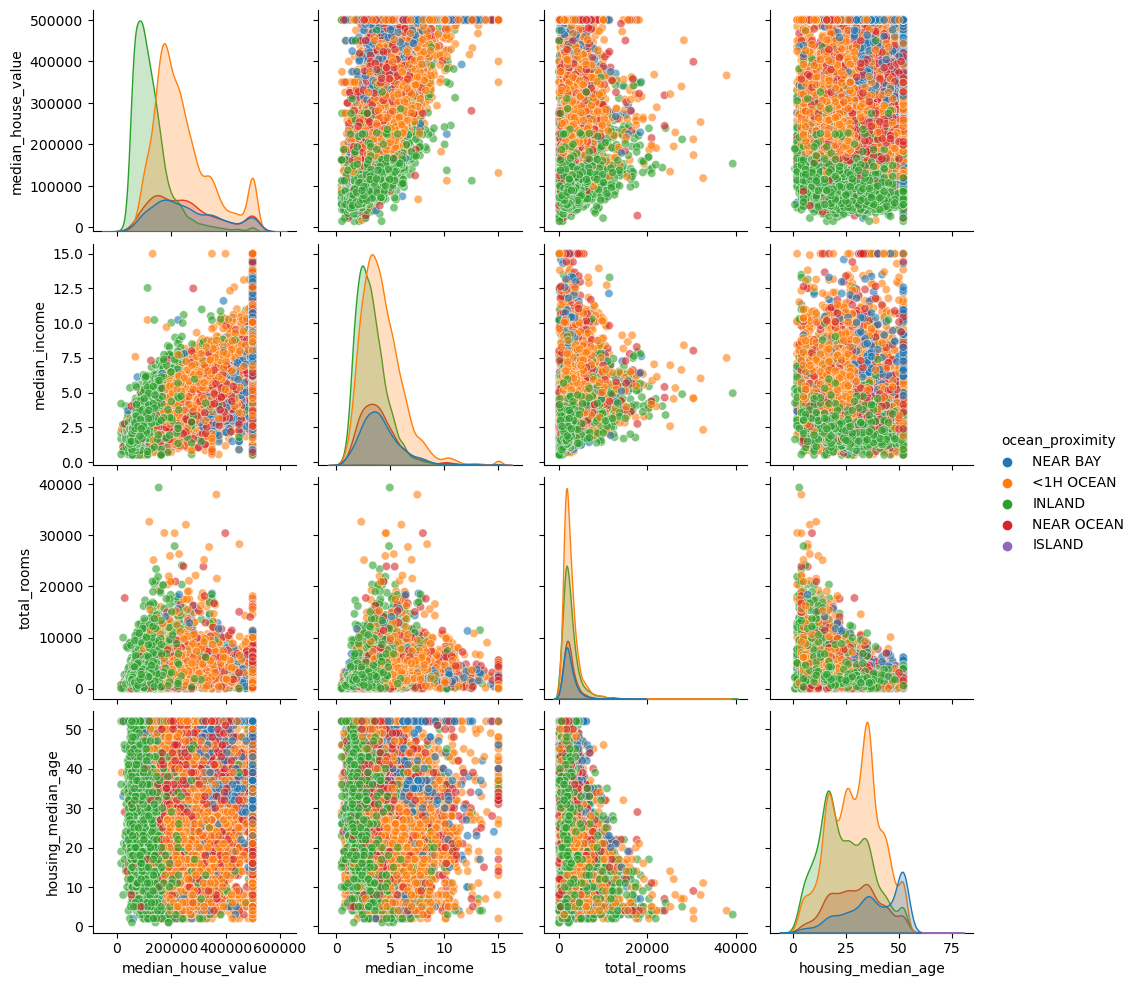

In [133]:
sns.pairplot(data[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'ocean_proximity']],
             hue='ocean_proximity', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

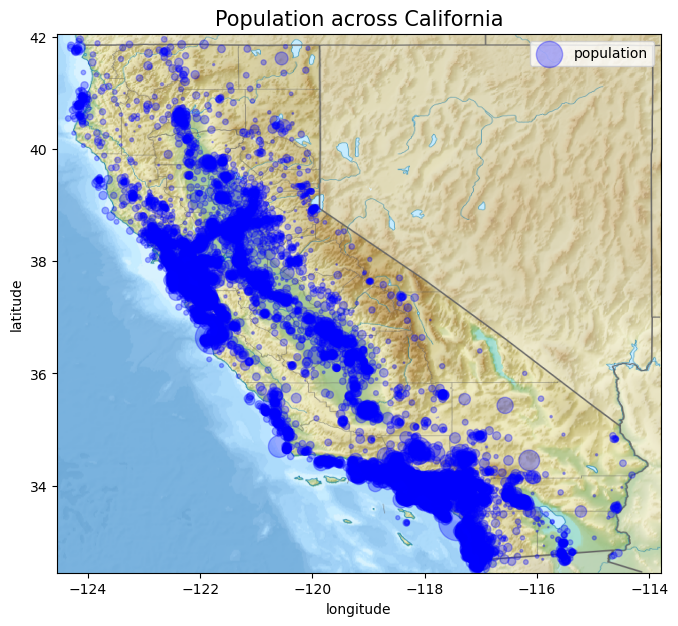

In [37]:
california_img = plt.imread("C:\\Users\\shekh\\Downloads\\Relief_map_of_California.png")
data.plot(kind='scatter', x='longitude', y='latitude',  alpha=0.3,
                s=data['population']/50, label='population', figsize=(10,7), c='b', zorder=2)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
plt.title('Population across California',fontsize=15)
plt.legend() 
plt.show()

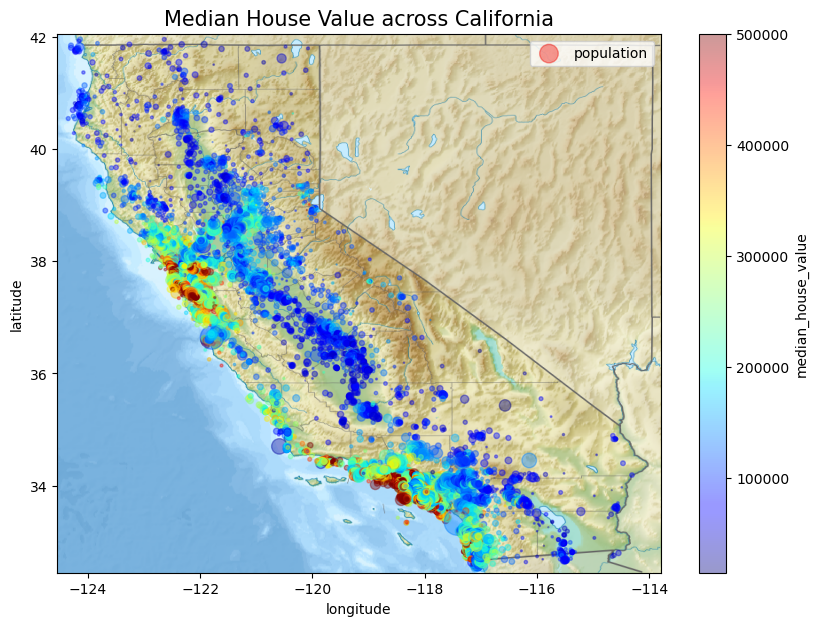

In [51]:
california_img = plt.imread("C:\\Users\\shekh\\Downloads\\Relief_map_of_California.png")

data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=data['population']/100, label='population', figsize=(10,7),
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
plt.title('Median House Value across California',fontsize=15)
plt.legend() 
plt.show()

Text(0.5, 1.0, 'Median house value across california')

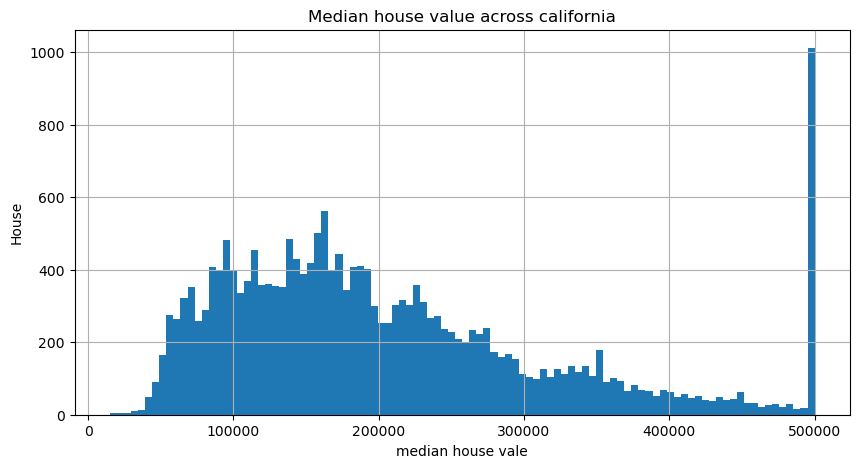

In [57]:
plt.figure(figsize=(10,5))
data['median_house_value'].hist(bins=100)
plt.xlabel('median house vale')
plt.ylabel('House')
plt.title('Median house value across california')

<Figure size 2500x1500 with 0 Axes>

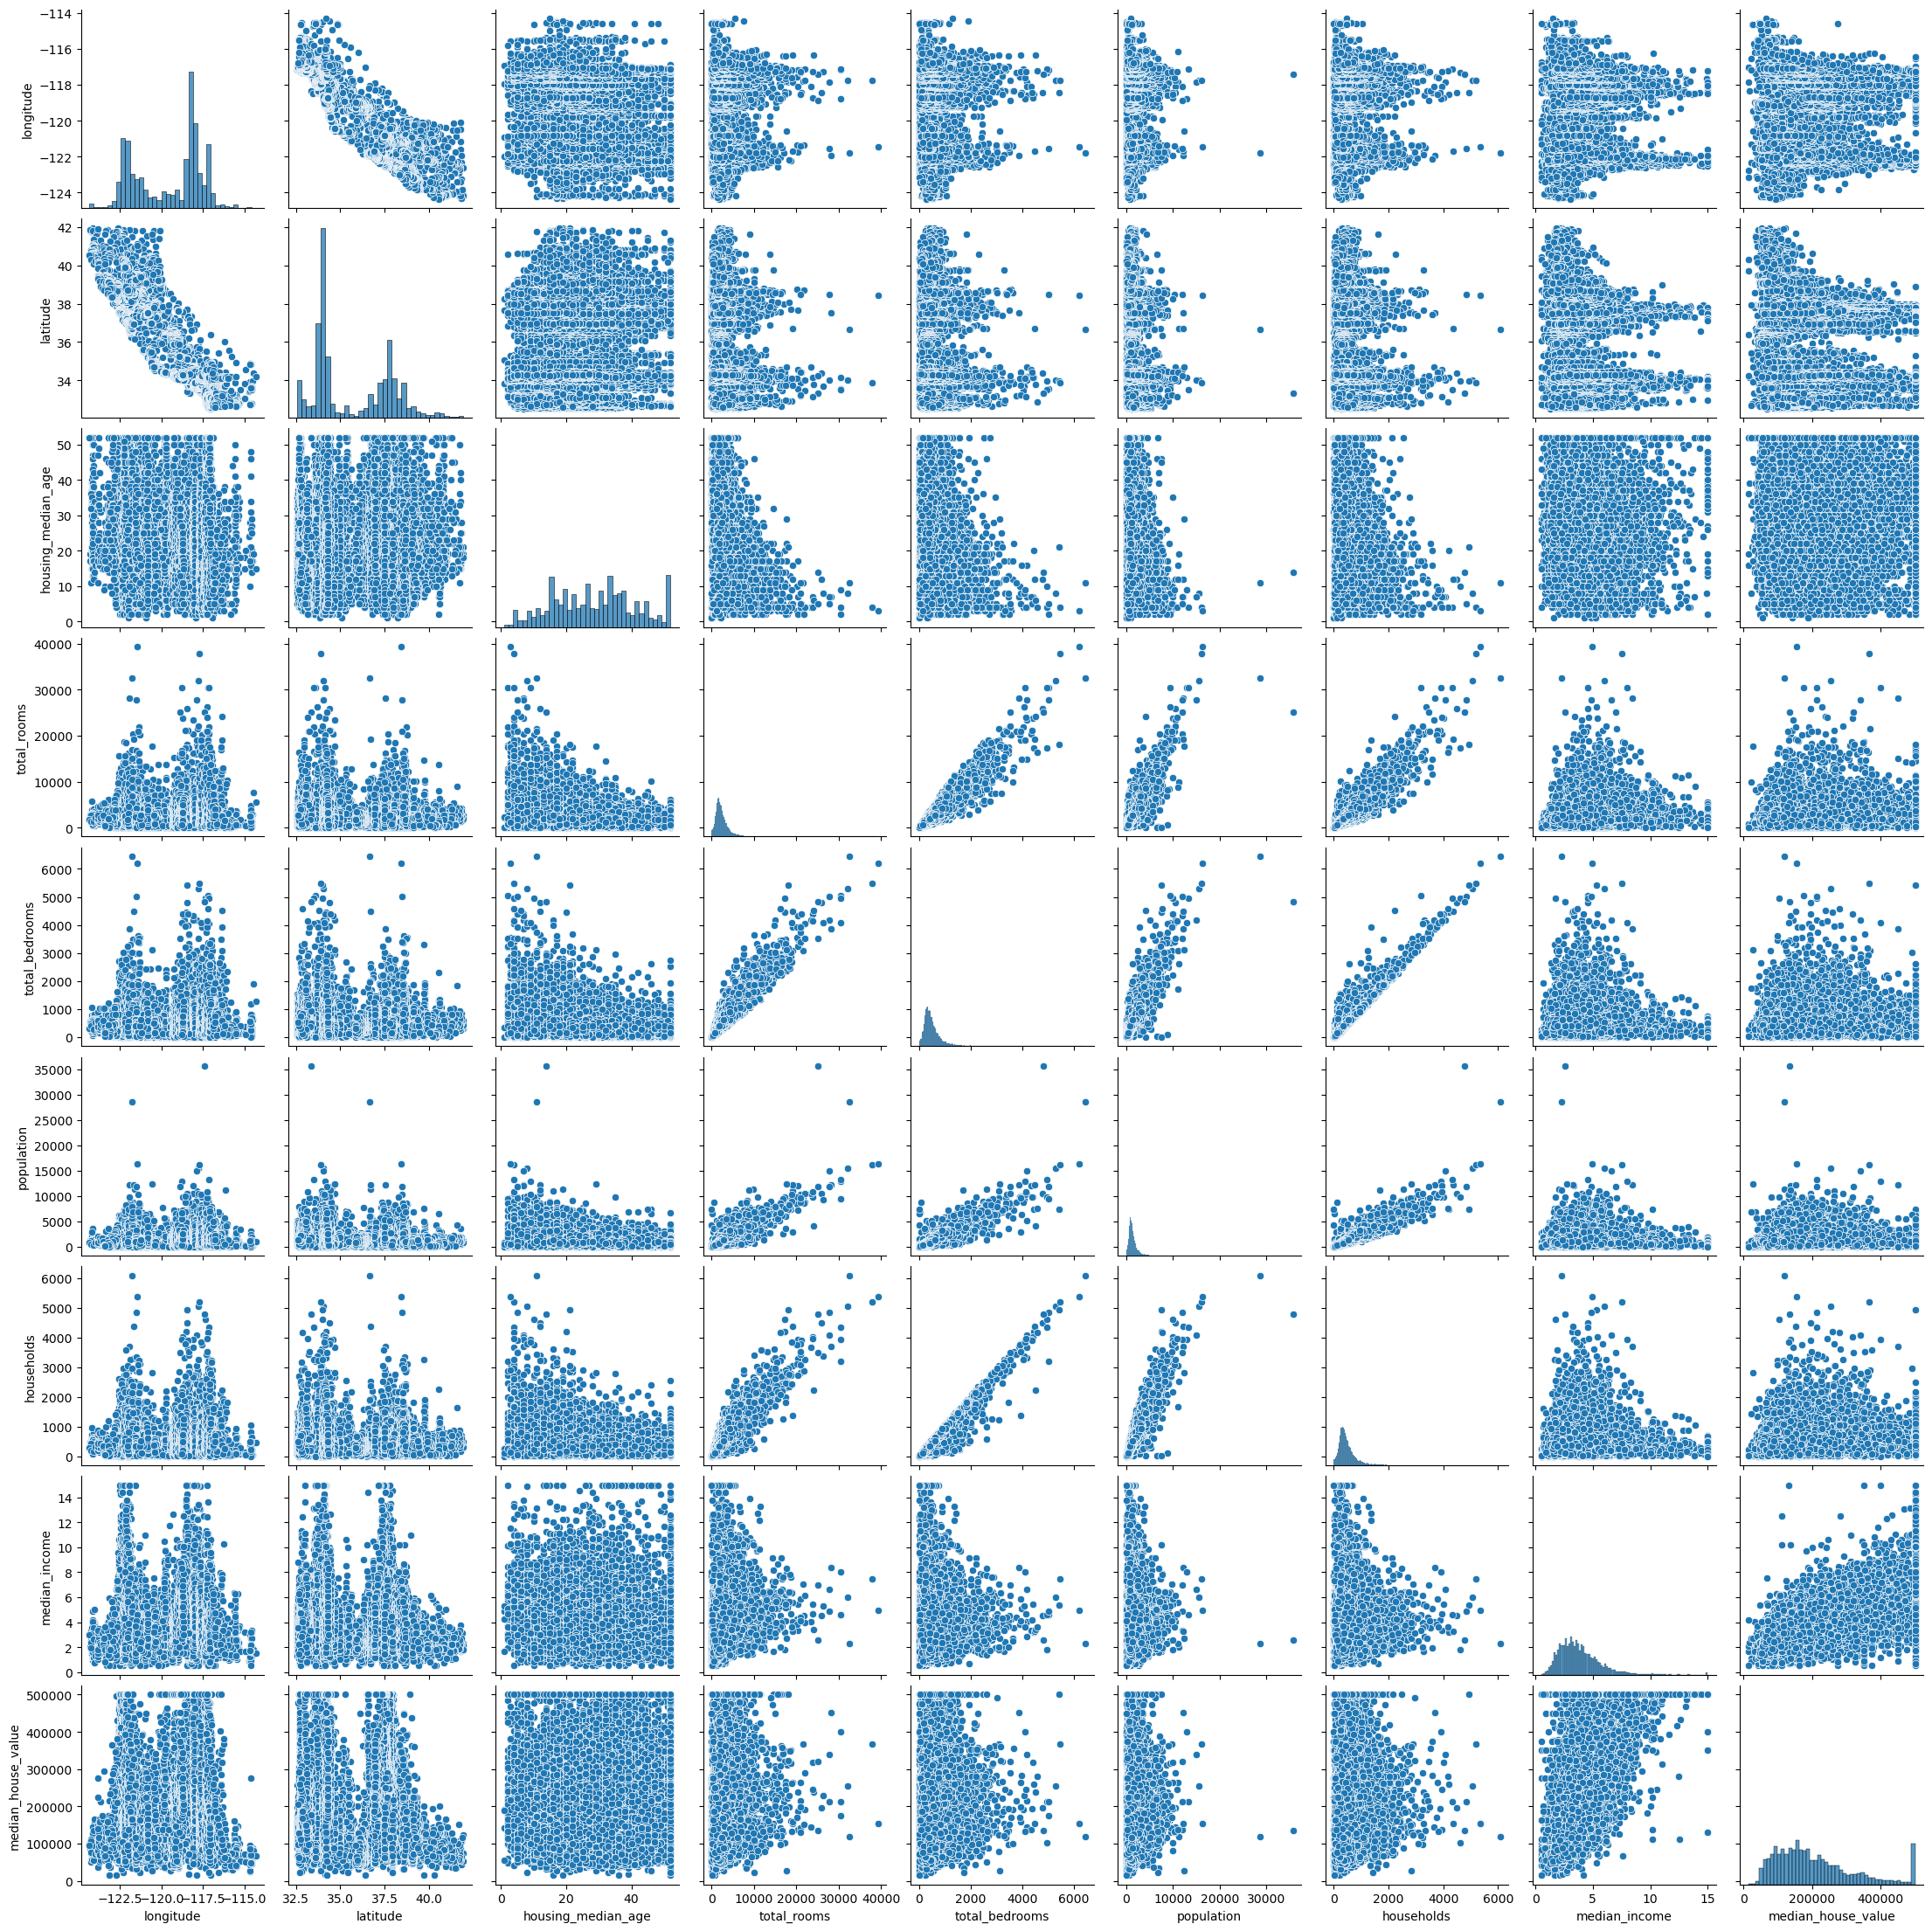

In [59]:
plt.figure(figsize=(25,15))
sns.pairplot(data)

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

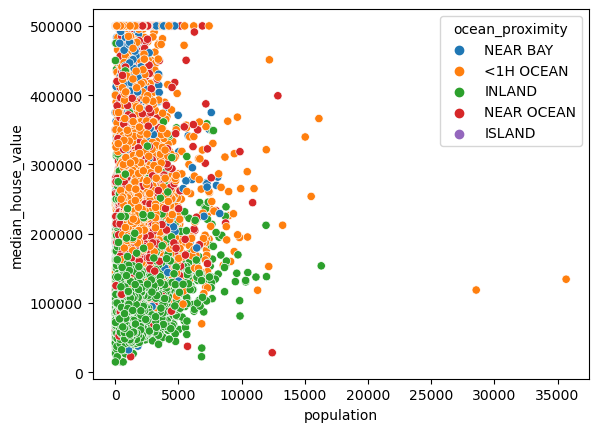

In [62]:
sns.scatterplot(data=data, x ='population', y='median_house_value', hue='ocean_proximity')

- AS we can see in above that most houses are inland and bay area, houses in bay area and <1H ocean are expensive as compared to island and houses on island are cheaper

#### To see Correlation in data


In [64]:
corr_matrix = data.corr()

In [67]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [91]:
#handling the missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [94]:
data.corr()['total_bedrooms'].sort_values(ascending=False)

total_bedrooms        1.000000
households            0.979728
total_rooms           0.930380
population            0.877747
longitude             0.069608
median_house_value    0.049686
median_income        -0.007723
latitude             -0.066983
housing_median_age   -0.320451
Name: total_bedrooms, dtype: float64

In [97]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['households'])

In [117]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [134]:
#encoding the data 
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'])

In [135]:
data_encoded.head(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1                          0                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
1                         1                           0

In [151]:
def test_regression_algorithms(data):
    # Step 2: Split the dataset into features (X) and the target (y)
    X = data.drop('median_house_value', axis=1)
    y = data['median_house_value']

    # Step 3: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Initialize ML models with hyperparameters to tune
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor()
    }

    # Step 5: Perform hyperparameter tuning using GridSearchCV
    param_grid = {
        'Linear Regression': {},
        'Decision Tree': {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
        'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
    }

    best_models = {}

    for model_name, model in models.items():
        grid_search = GridSearchCV(model, param_grid[model_name], scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train, y_train)

        # Step 6: Train each model with the best hyperparameters on the training data
        best_model = grid_search.best_estimator_

        # Step 7: Evaluate each model's performance on the testing data
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)

        best_models[model_name] = {'model': best_model, 'mse': mse}

    return best_models

In [152]:
test_regression_algorithms(data_encoded)

{'Linear Regression': {'model': LinearRegression(), 'mse': 4799640436.551617},
 'Decision Tree': {'model': DecisionTreeRegressor(max_depth=10, min_samples_split=10),
  'mse': 3701285728.7812},
 'Random Forest': {'model': RandomForestRegressor(n_estimators=300),
  'mse': 2364441961.845193}}

In [154]:
# Usage (assuming 'data' contains the loaded California housing dataset)
results = test_regression_algorithms(data_encoded)

# Display the best models and their Mean Squared Error (MSE)
for model_name, model_info in results.items():
    print(f"{model_name}:")
    print(f"Best Hyperparameters: {model_info['model']}")
    print(f"Mean Squared Error: {model_info['mse']}\n")

Linear Regression:
Best Hyperparameters: LinearRegression()
Mean Squared Error: 4799640436.551617

Decision Tree:
Best Hyperparameters: DecisionTreeRegressor(max_depth=10, min_samples_split=10)
Mean Squared Error: 3686584477.9264865

Random Forest:
Best Hyperparameters: RandomForestRegressor(n_estimators=300)
Mean Squared Error: 2368851853.6520667

